> Nama : Vivi Fitriyani

> NIM : 1306620050

#<center>Klasifikasi dengan Logistic Regression


Misalkan Anda sebagai staf admisi diminta untuk menentukan besar peluang 
penerimaan mahasiswa baru berdasarkan hasil dua ujian. Anda diberi data historis 
data2d40c2.txt untuk melatih model klasifikator regresi logistik. Data sampel berisi 
pasangan input X (skor hasil dua ujian) dan y, yakni label kelas berupa keputusan 
penerimaan {1/0}. Tugas Anda adalah membangun model klasifikasi yang 
memperkirakan probabilitas penerimaan calon mahasiswa berdasarkan skor dari 
kedua ujian tersebut. Note: Sebelum memulai pelajari terlebih dahulu buku referensi. 
Kemudian lakukan langkah-langkah sbb.:


##Import Libary

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

##Menginisiasi Data set

In [62]:
data = np.loadtxt('/content/datatrain2d40c2 (1).txt', delimiter=',')
X_train = data[:, :2] 
y_train = data[:, -1]
data = np.loadtxt('/content/datatrain2d40c2 (1).txt', delimiter=',')
Xn_test = data[:, :-1]
yn_test = data[:, -1]



###1. Lakukan plotting data untuk analisa awal data, tampilan misalnya seperti ini

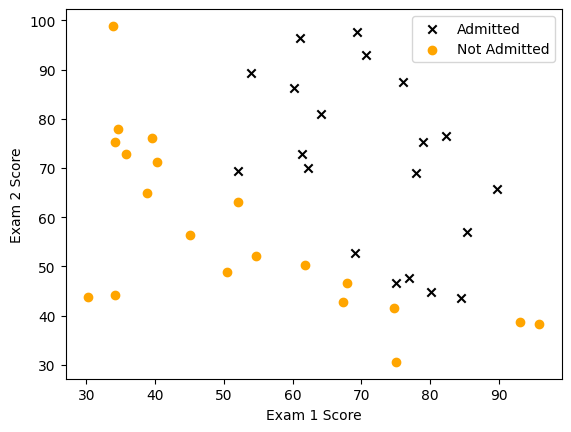

In [63]:
positive_examples = X_train[np.where(y_train == 1)]
negative_examples = X_train[np.where(y_train == 0)]
plt.scatter(positive_examples[:, 0], positive_examples[:, 1], color='black', label='Admitted', marker = 'x')
plt.scatter(negative_examples[:, 0], negative_examples[:, 1], color='orange', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

###2. Gunakan fungsi sigmoid 𝑔(𝑧) sebagai fungsi hipotesis :

<center> $hw(x) = g(z) $ 



dimana :

<center> $\frac{1}{1 - e^z}$ dan $z = Θ^T x $ <center>

Buatlah fungsi sigmoid tersebut dalam Python sehingga dapat dipanggil oleh fungsi 
lain dalam program Anda. Setelah selesai, cobalah uji beberapa nilai dengan 
memanggil sigmoid(x) pada baris perintah Python. Untuk nilai x positif yang besar, 
sigmoid harus mendekati 1, sedangkan untuk nilai negatif yang besar, sigmoid 
harus mendekati 0. Pastikan bahwa luaran sigmoid(0) = 0,5.

In [64]:
def sigmoid(z):
 return 1.0 / (1.0 + np.exp(-z))


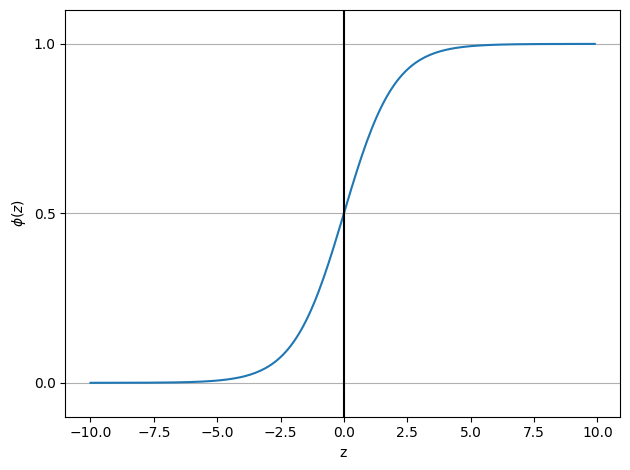

In [65]:
#Melakukan Plotting dengan pemisalan
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

###  3. Sekarang tulis fungsi costFun(theta, X, y) pada Python untuk regresi logistik yang mengembalikan nilai cost dan gradien. cost dihitung dengan persamaan:

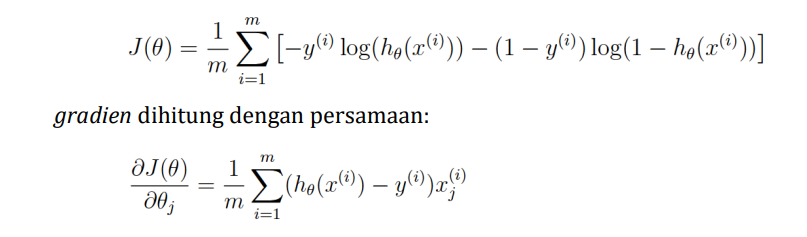

In [66]:
def costFun(theta, X, y):
    m = len(y)  # Jumlah sampel data
    h = sigmoid(np.dot(X, theta))  # Menghitung prediksi
    
    # Menghitung nilai cost
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    # Menghitung gradien
    grad = (1/m) * np.dot(X.T, (h - y))
    
    return cost, grad


###4.  Untuk membangun klasifikator regresi logistik, pertama inisialisasi nilai parameter θ dengan harga kecil sembarang, misalnya 0,1. Hitung berapa nilai cost dan gradien dengan data latih yang ada. Kemudian optimalkan fungsi J(θ) dengan update parameter θ dengan aturan gradient ascent :


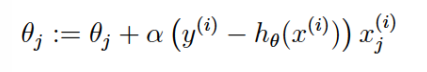

In [67]:
def logistic_regression(X, y, alpha=0.00001, num_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Inisialisasi parameter theta
    cost_history = []  # Menyimpan nilai cost pada setiap iterasi
    
    for _ in range(num_iters):
        cost, grad = costFun(theta, X, y)  # Menghitung nilai cost dan gradien
        
        # Update parameter theta menggunakan gradient ascent
        theta = theta + alpha * grad
        
        cost_history.append(cost)
    
    return theta, cost_history

In [68]:
# Memanggil fungsi logistic_regression
theta_optimal, cost_history = logistic_regression(X_train, y_train)

print("Parameter theta yang dioptimalkan:")
print(theta_optimal)

print("Nilai cost pada setiap iterasi:")
print(cost_history)


Parameter theta yang dioptimalkan:
[-0.33150893 -0.32840009]
Nilai cost pada setiap iterasi:
[0.6931471805599454, 0.6934950761700005, 0.6938571349684508, 0.6942339435825127, 0.6946261126856008, 0.6950342779441505, 0.6954591009973883, 0.6959012704707468, 0.6963615030235852, 0.6968405444318366, 0.6973391707061521, 0.697858189246057, 0.6983984400305655, 0.698960796845626, 0.699546168548682, 0.700155500370534, 0.7007897752545751, 0.7014500152333563, 0.7021372828422829, 0.7028526825701047, 0.7035973623456759, 0.7043725150602791, 0.7051793801245902, 0.7060192450591377, 0.7068934471168449, 0.7078033749359783, 0.708750470221514, 0.7097362294526113, 0.7107622056135222, 0.7118300099448881, 0.7129413137119492, 0.7140978499857611, 0.7153014154330202, 0.7165538721096043, 0.717857149252379, 0.7192132450632511, 0.7206242284788373, 0.7220922409184716, 0.7236194980025964, 0.7252082912328802, 0.7268609896246557, 0.7285800412815141, 0.7303679749010966, 0.7322274012003107, 0.7341610142473662, 0.7361715926

###5. Setelah pelatihan selesai, coba gunakan model tersebut untuk memprediksi apakah seorang calon mahasiswa akan diterima jika skor ujian: 45 dan 85. Untuk itu Anda tulis fungsi predik(X) yang memberikan luaran nilai probabilitas penerimaan.

In [69]:
def predik(X, theta):
    h = sigmoid(np.dot(X, theta))  # Menghitung prediksi menggunakan fungsi sigmoid
    prob = h  # Probabilitas penerimaan
    
    return prob

In [70]:
# Menentukan skor ujian
X_test = np.array([1, 45, 85]) 

theta = np.array([-24.161272, 0.206233, 0.201470])
probabilitas = predik(X_test, theta)

print("Probabilitas penerimaan:", probabilitas)


Probabilitas penerimaan: 0.9041458568898033


### 6. Buatlah plot data latih dan garis batas keputusan (decision boundary) pada satu grafik. Contoh tampilan seperti di bawah ini:

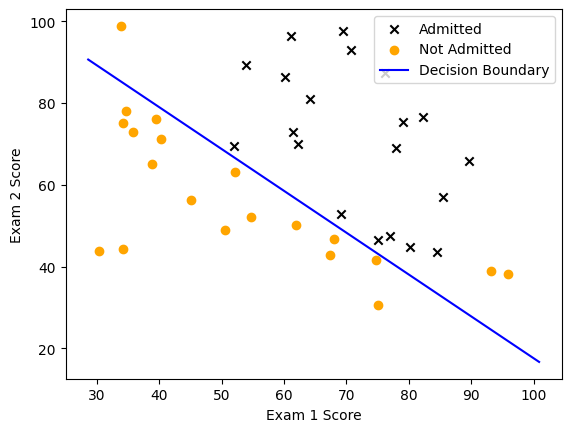

In [71]:
def plot_decision_boundary(X, y, theta):
    # Separate positive and negative examples
    positive_examples = X[np.where(y == 1)]
    negative_examples = X[np.where(y == 0)]

    # Plotting the data points


    plt.scatter(positive_examples[:, 0], positive_examples[:, 1], color='black', label='Admitted', marker = 'x')
    plt.scatter(negative_examples[:, 0], negative_examples[:, 1], color='orange', label='Not Admitted')

    # Plotting the decision boundary
    x_boundary = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
    plt.plot(x_boundary, y_boundary, color='blue', label='Decision Boundary')

    # Add labels and legend
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

# Example parameter vector
theta = np.array([-24.161272, 0.206233, 0.201470])
# Plotting the decision boundary
plot_decision_boundary(Xn_test, yn_test, theta)


### 7. Ujilah model tersebut dengan test data: datatest2d10c2.txt . Buatlah matriks konfusi, kemudian hitunglah accuracy, recall, dan F1-score.

In [72]:
X_test_intercept = np.insert(Xn_test, 0, 1, axis=1)

y_pred = np.round(sigmoid(np.dot(X_test_intercept, theta)))

confusion_mat = confusion_matrix(yn_test, y_pred)
accuracy = accuracy_score(yn_test, y_pred)
recall = recall_score(yn_test, y_pred)
f1 = f1_score(yn_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[17  3]
 [ 0 20]]
Accuracy: 0.925
Recall: 1.0
F1-score: 0.9302325581395349
